https://www.kaggle.com/competitions/playground-series-s4e8

In [1]:
from fastkaggle import *
from pathlib import Path
import zipfile
import pandas as pd
import polars as pl
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
comp_name = "playground-series-s4e8"

In [3]:
setup_comp(comp_name)

Path('playground-series-s4e8')

In [4]:
datapath = Path(comp_name)

In [5]:
df_train = pl.read_csv(f'{datapath}/train.csv')

In [6]:
df_train.head()

id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
i64,str,f64,str,str,str,str,str,str,str,f64,f64,str,str,str,str,str,str,str,str,str,str
0,"""e""",8.8,"""f""","""s""","""u""","""f""","""a""","""c""","""w""",4.51,15.39,null,null,"""w""",null,null,"""f""","""f""",null,"""d""","""a"""
1,"""p""",4.51,"""x""","""h""","""o""","""f""","""a""","""c""","""n""",4.79,6.48,null,"""y""","""o""",null,null,"""t""","""z""",null,"""d""","""w"""
2,"""e""",6.94,"""f""","""s""","""b""","""f""","""x""","""c""","""w""",6.85,9.93,null,"""s""","""n""",null,null,"""f""","""f""",null,"""l""","""w"""
3,"""e""",3.88,"""f""","""y""","""g""","""f""","""s""",null,"""g""",4.16,6.53,null,null,"""w""",null,null,"""f""","""f""",null,"""d""","""u"""
4,"""e""",5.85,"""x""","""l""","""w""","""f""","""d""",null,"""w""",3.37,8.36,null,null,"""w""",null,null,"""f""","""f""",null,"""g""","""a"""


In [7]:
print(f"There are {df_train.shape[1]} columns and {df_train.shape[0]} rows in the train dataset.")


There are 22 columns and 3116945 rows in the train dataset.


In [8]:
df_train.schema

Schema([('id', Int64),
        ('class', String),
        ('cap-diameter', Float64),
        ('cap-shape', String),
        ('cap-surface', String),
        ('cap-color', String),
        ('does-bruise-or-bleed', String),
        ('gill-attachment', String),
        ('gill-spacing', String),
        ('gill-color', String),
        ('stem-height', Float64),
        ('stem-width', Float64),
        ('stem-root', String),
        ('stem-surface', String),
        ('stem-color', String),
        ('veil-type', String),
        ('veil-color', String),
        ('has-ring', String),
        ('ring-type', String),
        ('spore-print-color', String),
        ('habitat', String),
        ('season', String)])

In [9]:
df_train.null_count()

id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,4,40,671023,12,8,523936,1258435,57,0,0,2757023,1980861,38,2957493,2740947,24,128880,2849682,45,0


In [13]:
df_train.to_pandas().isnull()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,False,False,True,False,False
3,False,False,False,False,False,False,False,False,True,False,...,True,True,False,True,True,False,False,True,False,False
4,False,False,False,False,False,False,False,False,True,False,...,True,True,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,False,False,False,False,True,False,False,True,True,False,...,False,True,False,False,False,False,False,True,False,False
3116941,False,False,False,False,True,False,False,False,False,False,...,True,True,False,True,True,False,False,True,False,False
3116942,False,False,False,False,False,False,False,False,True,False,...,True,True,False,True,False,False,False,True,False,False
3116943,False,False,False,False,False,False,False,False,True,False,...,True,False,False,True,True,False,False,True,False,False


In [15]:
df_train_nulls = df_train.to_pandas().isnull()

Visualize missing data 

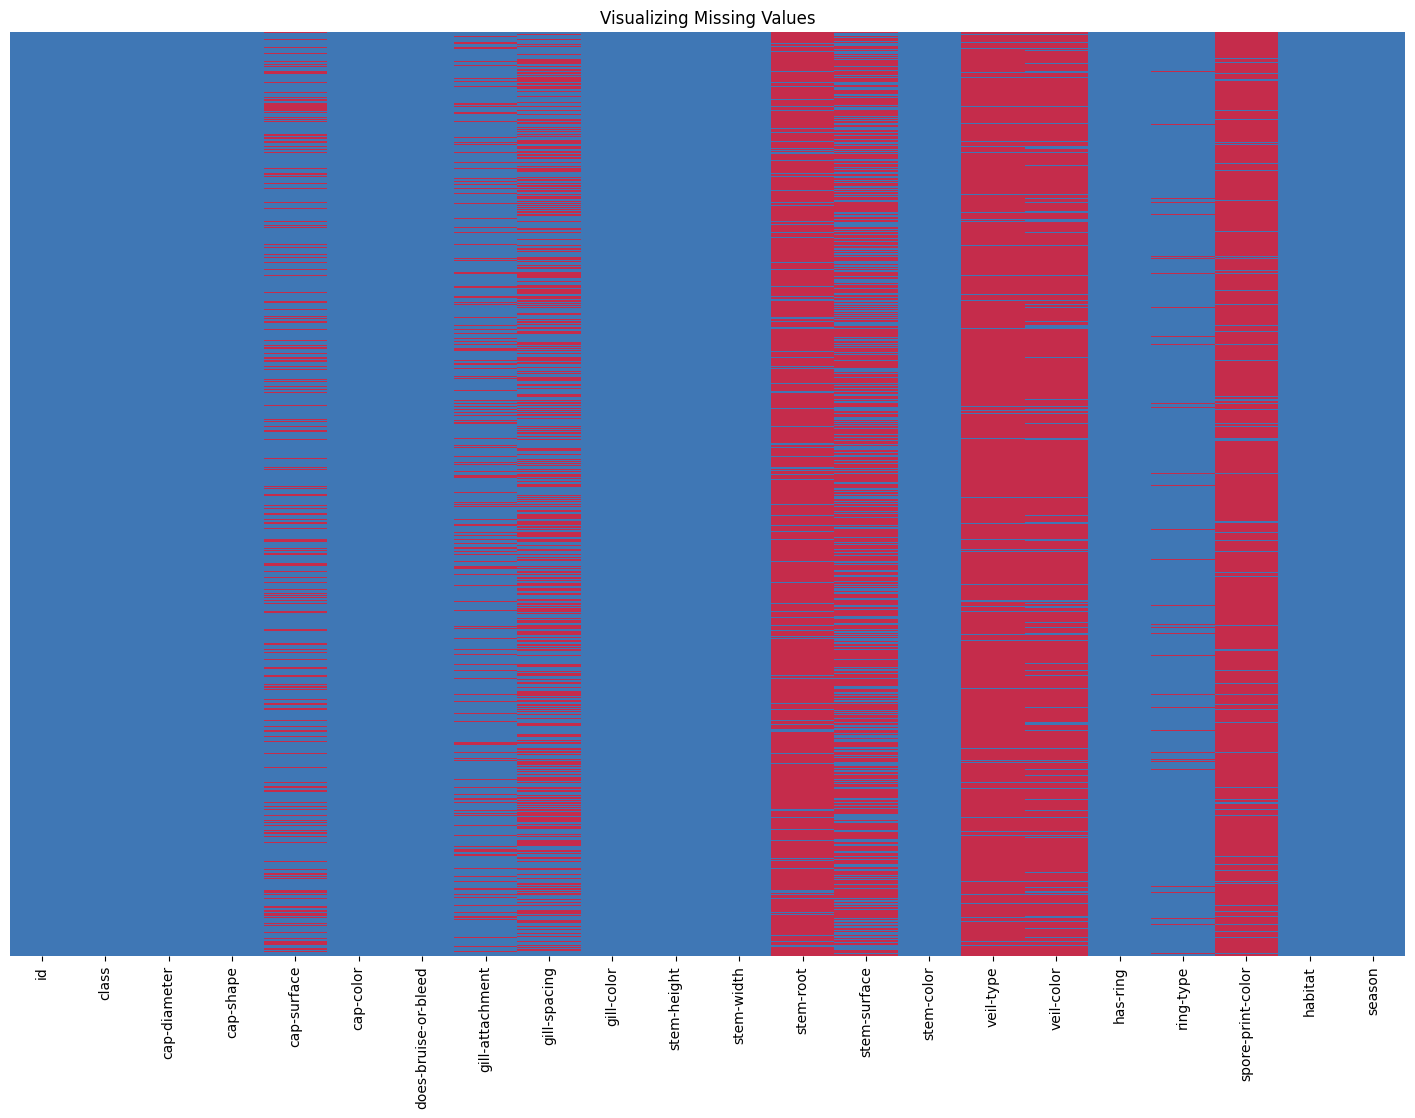

In [16]:
plt.figure(figsize=(18,12))
plt.title("Visualizing Missing Values")
sns.heatmap(df_train_nulls, cbar=False, cmap=sns.color_palette("Spectral_r", n_colors=13), yticklabels=False);

In [11]:
df_train.describe()

statistic,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
str,f64,str,f64,str,str,str,str,str,str,str,f64,f64,str,str,str,str,str,str,str,str,str,str
"""count""",3.116945e6,"""3116945""",3.116941e6,"""3116905""","""2445922""","""3116933""","""3116937""","""2593009""","""1858510""","""3116888""",3.116945e6,3.116945e6,"""359922""","""1136084""","""3116907""","""159452""","""375998""","""3116921""","""2988065""","""267263""","""3116900""","""3116945"""
"""null_count""",0.0,"""0""",4.0,"""40""","""671023""","""12""","""8""","""523936""","""1258435""","""57""",0.0,0.0,"""2757023""","""1980861""","""38""","""2957493""","""2740947""","""24""","""128880""","""2849682""","""45""","""0"""
"""mean""",1.558472e6,null,6.309848,null,null,null,null,null,null,null,6.348333,11.153785,null,null,null,null,null,null,null,null,null,null
"""std""",899784.661737,null,4.657931,null,null,null,null,null,null,null,2.699755,8.095477,null,null,null,null,null,null,null,null,null,null
"""min""",0.0,"""e""",0.03,"""0""","""0""","""1""","""2""","""0""","""0""","""0""",0.0,0.0,"""1""","""0""","""1""","""21""","""2""","""10""","""1""","""10 None""","""1""","""a"""
"""25%""",779236.0,null,3.32,null,null,null,null,null,null,null,4.67,4.97,null,null,null,null,null,null,null,null,null,null
"""50%""",1.558472e6,null,5.75,null,null,null,null,null,null,null,5.88,9.65,null,null,null,null,null,null,null,null,null,null
"""75%""",2.337708e6,null,8.24,null,null,null,null,null,null,null,7.41,15.63,null,null,null,null,null,null,null,null,null,null
"""max""",3.116944e6,"""p""",80.67,"""z""","""z""","""z""","""z""","""z""","""y""","""z""",88.72,102.9,"""z""","""z""","""z""","""y""","""z""","""z""","""z""","""y""","""z""","""w"""


In [ ]:
df_train.dtypes

In [ ]:
df_train.select(pl.all().approx_n_unique())

In [ ]:
df_train.columns

Take a look at the value counts for the target 

In [ ]:
df_train['class'].value_counts()

Split the training set into data and target

In [ ]:
x = df_train.drop('class')
y = df_train['class']

For a less ordinal data we could use `One Hot Encoding`, but since the prediction is binary we would can use a basic mapping or sklearn's `LabelEncoder`

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
cat_cols = [col for col, dtype in x.schema.items() if dtype == pl.Utf8]
num_cols = [col for col in x.columns if col not in cat_cols]

In [ ]:
cat_cols

In [ ]:
num_cols

Create categorical transformer, handle NaN vals

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

Create numeric transformer, handle NaN vals

In [ ]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')) 
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

Split to training and test sets

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

In [ ]:
y_train[:10]

Create a classifier

In [ ]:
pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier(n_estimators=40, max_samples=200_000, random_state=42, verbose=2)),
    ]
)

Run fit 

In [ ]:
x_train_pandas = x_train.to_pandas()

In [ ]:
pipeline.fit(x_train_pandas, y_train)

In [ ]:
y_pred = pipeline.predict(x_test)

In [ ]:
y_pred.shape

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

In [ ]:
X_test = pl.read_csv(f'{datapath}/test.csv')

In [ ]:
preds = pipeline.predict(X_test)

In [ ]:
label_encoder.inverse_transform(preds)

In [ ]:
sample_df = pd.read_csv(datapath/'sample_submission.csv')

In [ ]:
sample_df.head()

In [ ]:
decoded_preds = label_encoder.inverse_transform(preds)

In [ ]:
sample_df['class'] = decoded_preds

In [ ]:
sample_df

In [ ]:
sample_df.to_csv('submission.csv', index=False)


In [ ]:
submit = True

In [ ]:
if not iskaggle and submit:
    from kaggle import api
    api.competition_submit_cli(file_name='submission.csv', message="baseline model", competition=comp_name)